In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt


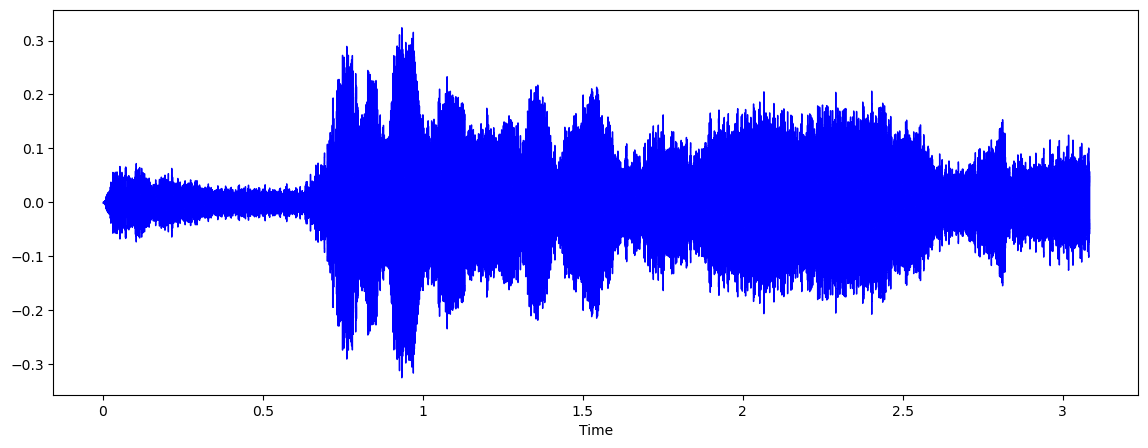

In [15]:
AUDIO_FILE = './cat_data/Angry/car_extcoll0103_aug1(1).mp3' #test sample
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(samples, sr=sample_rate, color="blue") #display soundwave

In [17]:
from IPython.display import Audio
Audio('./cat_data/Angry/car_extcoll0103_aug1(1).mp3') #test sound of sample

C:\Users\jorda\AppData\Local\Temp\ipykernel_12776\2304845838.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(sgram)


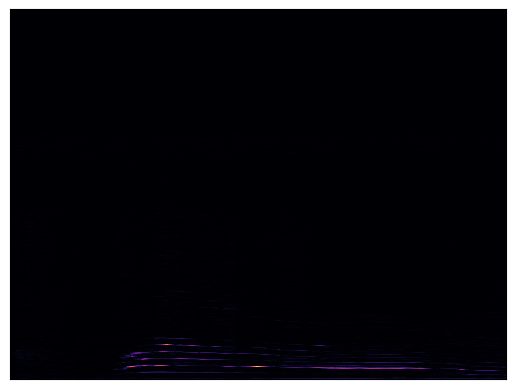

In [19]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram) #raw spectogram, intensity of color is amplitude

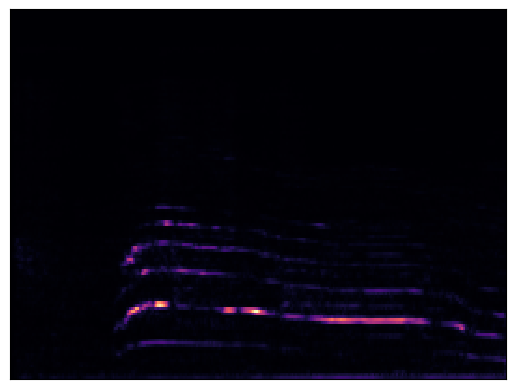

In [20]:
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate) #mel scale is log-scale way to visualize audio frequncy data, closer to what humans hear
librosa.display.specshow(mel_scale_sgram)

In [22]:
import numpy as np

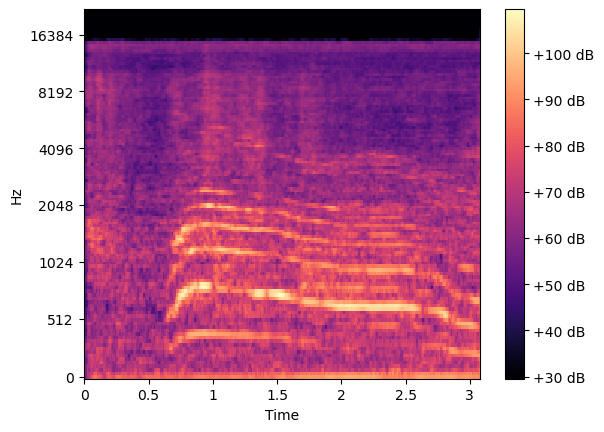

In [23]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel') #decibel scale - log-scale way to visualize audio amplitude data, 
plt.colorbar(format='%+2.0f dB')

In [24]:
#Spectrogram is a 2D numpy array
print(type(mel_sgram), mel_sgram.shape)
# <class 'numpy.ndarray'> (128, 134)

<class 'numpy.ndarray'> (128, 266)


In [25]:
mel_sgram

array([[51.1942  , 57.536415, 68.78476 , ..., 90.95784 , 90.90106 ,
        90.24697 ],
       [48.06804 , 59.601215, 70.337746, ..., 89.11996 , 85.69812 ,
        90.60326 ],
       [45.009605, 60.278835, 68.91182 , ..., 75.034485, 80.34555 ,
        86.35414 ],
       ...,
       [29.5486  , 29.5486  , 29.5486  , ..., 29.5486  , 29.5486  ,
        29.5486  ],
       [29.5486  , 29.5486  , 29.5486  , ..., 29.5486  , 29.5486  ,
        29.5486  ],
       [29.5486  , 29.5486  , 29.5486  , ..., 29.5486  , 29.5486  ,
        29.5486  ]], dtype=float32)

The test sample is now a 2D array that can be used in a CNN. Now to change all the rest of the dataset into these spectograms and add the corresponding label to each observation to finish the data preparation.